<h1><font color='blue'> 8E and 8F: Finding the Probability P(Y==1|X)</font></h1>

<h2><font color='Geen'> 8E: Implementing Decision Function of SVM RBF Kernel</font></h2>

<font face=' Comic Sans MS' size=3>After we train a kernel SVM model, we will be getting support vectors and their corresponsing coefficients $\alpha_{i}$

Check the documentation for better understanding of these attributes: 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<img src='https://i.imgur.com/K11msU4.png' width=500>

As a part of this assignment you will be implementing the ```decision_function()``` of kernel SVM, here decision_function() means based on the value return by ```decision_function()``` model will classify the data point either as positive or negative

Ex 1: In logistic regression After traning the models with the optimal weights $w$ we get, we will find the value $\frac{1}{1+\exp(-(wx+b))}$, if this value comes out to be < 0.5 we will mark it as negative class, else its positive class

Ex 2: In Linear SVM After traning the models with the optimal weights $w$ we get, we will find the value of $sign(wx+b)$, if this value comes out to be -ve we will mark it as negative class, else its positive class.

Similarly in Kernel SVM After traning the models with the coefficients $\alpha_{i}$ we get, we will find the value of 
$sign(\sum_{i=1}^{n}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here $K(x_{i},x_{q})$ is the RBF kernel. If this value comes out to be -ve we will mark $x_{q}$ as negative class, else its positive class.

RBF kernel is defined as: $K(x_{i},x_{q})$ = $exp(-\gamma ||x_{i} - x_{q}||^2)$

For better understanding check this link: https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation
</font>

## Task E

> 1. Split the data into $X_{train}$(60), $X_{cv}$(20), $X_{test}$(20)

> 2. Train $SVC(gamma=0.001, C=100.)$ on the ($X_{train}$, $y_{train}$)

> 3. Get the decision boundry values $f_{cv}$ on the $X_{cv}$ data  i.e. ` `$f_{cv}$ ```= decision_function(```$X_{cv}$```)```  <font color='red'>you need to implement this decision_function()</font>

In [29]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt

In [30]:
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [31]:
print(X.shape)

(5000, 5)


### Pseudo code

clf = SVC(gamma=0.001, C=100.)<br>
clf.fit(Xtrain, ytrain)

<font color='green'>def</font> <font color='blue'>decision_function</font>(Xcv, ...): #use appropriate parameters <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>for</font> a data point $x_q$ <font color='green'>in</font> Xcv: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='grey'>#write code to implement $(\sum_{i=1}^{\text{all the support vectors}}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here the values $y_i$, $\alpha_{i}$, and $intercept$ can be obtained from the trained model</font><br>
   <font color='green'>return</font> <font color='grey'><i># the decision_function output for all the data points in the Xcv</i></font>
    
fcv = decision_function(Xcv, ...)  <i># based on your requirement you can pass any other parameters </i>

<b>Note</b>: Make sure the values you get as fcv, should be equal to outputs of clf.decision_function(Xcv)


In [32]:
x_tr,x_te,y_tr,y_te=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=0)
x_tr,x_cv,y_tr,y_cv=train_test_split(x_tr,y_tr,train_size=0.75,test_size=0.25,random_state=0)
print(x_tr.shape,x_cv.shape)

(3000, 5) (1000, 5)


In [33]:
clf=SVC(gamma=0.001,C=100,random_state=0)
clf.fit(x_tr,y_tr)
alphas=clf.dual_coef_
svs=clf.support_vectors_
intercept=clf.intercept_

In [34]:
def decision_function(qs,svs,alphas,intercept,gamma):
  fcv=[]
  for i in qs:
    s=0
    for j in range(len(svs)):
      a=alphas[0][j]*math.exp((-gamma)*(np.linalg.norm(svs[j]-i))**2)
      s=s+a
    sign=s+intercept
    fcv.extend(sign)
  return fcv  


In [35]:
fcv=decision_function(x_cv,svs,alphas,intercept,0.001)
dcv=clf.decision_function(x_cv)

In [36]:
dcv=list(dcv)
print(fcv)
print(dcv)

[-4.168491935299853, -2.3489429210390944, -0.7757671155593733, 1.8685999796542512, 1.0546607543313962, -2.2064380252160283, -1.2806015031763258, -3.254200949990176, -0.22482947963285715, 0.10390296492012618, -3.1653246329649796, -2.031066761914699, -2.025041368825496, -2.3517702894445853, -3.183615762563688, -2.051091664485012, -1.5387658169155976, -1.6924018575822664, 1.6524344653022092, -1.0962534591275364, 1.0233876729593185, -1.5343069659907775, -2.3392011551586456, 0.5184584513133808, -3.196105563027684, 0.6185898165345542, -2.9827476356559663, 0.07055360181381554, -0.15391403831160977, 1.7159235847848486, -2.255088903666033, 1.952882949766265, -1.706285940542967, -3.6529585058049725, -2.8193228704216984, 1.8277523784708358, -2.262256320410214, -1.965858128454625, -1.8892570477853332, -0.710400138885658, -1.7545481300761288, -2.291055596581669, -1.1096148470187166, 1.315827833818974, -1.115478343682367, -0.7695987541121219, -0.31963665844598443, 1.8464615253763577, -2.080981292409

<h2><font color='Geen'> 8F: Implementing Platt Scaling to find P(Y==1|X)</font></h2>

Check this <a href='https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a'>PDF</a>
<img src='https://i.imgur.com/CAMnVnh.png'>


## TASK F


> 4. Apply SGD algorithm with ($f_{cv}$, $y_{cv}$) and find the weight $W$ intercept $b$ ```Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)``` 

> Note1: Don't forget to change the values of $y_{cv}$ as mentioned in the above image. you will calculate y+, y- based on data points in train data

> Note2: the Sklearn's SGD algorithm doesn't support the real valued outputs, you need to use the code that was done in the `'Logistic Regression with SGD and L2'` Assignment after modifying loss function, and use same parameters that used in that assignment.
<img src='https://i.imgur.com/zKYE9Oc.png'>
if Y[i] is 1, it will be replaced with y+ value else it will replaced with y- value

> 5. For a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as metioned in the above step

__Note: in the above algorithm, the steps 2, 4 might need hyper parameter tuning, To reduce the complexity of the assignment we are excluding the hyerparameter tuning part, but intrested students can try that__


If any one wants to try other calibration algorithm istonic regression also please check these tutorials

1. http://fa.bianp.net/blog/tag/scikit-learn.html#fn:1

2. https://drive.google.com/open?id=1MzmA7QaP58RDzocB0RBmRiWfl7Co_VJ7

3. https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a

4. https://stat.fandom.com/wiki/Isotonic_regression#Pool_Adjacent_Violators_Algorithm


In [37]:
plus=0
neg=0
for i in y_tr:
    if i==0:
        plus+=1
    else:
        neg+=1
print(plus)
print(neg) 
y_plus=(plus+1)/(plus+2) 
y_neg=1/(neg+2)
print(y_plus,y_neg)


2094
906
0.9995229007633588 0.0011013215859030838


In [38]:
print(y_cv.shape)
y_cv=y_cv.astype(np.float)
print(y_cv.dtype)

(1000,)
float64


In [39]:
for i in range(len(y_cv)):
  if y_cv[i]==0:
    y_cv[i]=float(y_neg)
  else:
    y_cv[i]=float(y_plus)

In [40]:
y_tr=y_tr.astype(np.float)
for i in range(len(y_tr)):
  if y_tr[i]==0:
    y_tr[i]=float(y_neg)
  else:
    y_tr[i]=float(y_plus)
print(y_tr)    

[0.00110132 0.9995229  0.00110132 ... 0.00110132 0.9995229  0.9995229 ]


In [41]:
def initialize_weights(row_vector):
    ''' In this function, we will initialize our weights and bias'''
    w=np.zeros_like(row_vector)
    b=0
    #you use zeros_like function to initialize zero, check this link https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html
    #initialize bias to zero
    return w,b

In [42]:
fcv=np.array(fcv)
fcv=fcv.reshape(-1,1)
print(fcv.shape)


(1000, 1)


In [43]:
dim=fcv[0]
w,b = initialize_weights(dim)
print('w =',(w))
print('b =',str(b))
print(w.shape)

w = [0.]
b = 0
(1,)


In [44]:
def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    # compute sigmoid(z) and return
    sigmoid=1/(1+math.exp(-z))
    return sigmoid

In [45]:
def logloss(y_true,y_pred):
    # you have been given two arrays y_true and y_pred and you have to calculate the logloss
    #while dealing with numpy arrays you can use vectorized operations for quicker calculations as compared to using loops
    #https://www.pythonlikeyoumeanit.com/Module3_IntroducingNumpy/VectorizedOperations.html
    #https://www.geeksforgeeks.org/vectorized-operations-in-numpy/
    #write your code here
    s=0
    for i in range(len(y_true)):
        a=(y_true[i]*math.log10(y_pred[i]))+((1-y_true[i])*math.log10(1-y_pred[i]))
        s=s+a
    logloss=-1*(1/len(y_true))*s
    return logloss

In [46]:
def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    dw=x*(y-sigmoid(np.dot(w,x)+b))-((alpha/N)*w)
    
    return dw

In [47]:
def gradient_db(x,y,w,b):
     '''In this function, we will compute gradient w.r.to b '''
     db=y-sigmoid(np.dot(w,x)+b)
        
     return db

In [48]:
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        z=np.dot(w,X[i])+b
        predict.append(sigmoid(z))
    return np.array(predict)

In [49]:
def train(X_train,y_train,epochs,alpha,eta0):
    ''' In this function, we will implement logistic regression'''
    #Here eta0 is learning rate
    #implement the code as follows
    # initalize the weights (call the initialize_weights(X_train[0]) function)
    w,b=initialize_weights(X_train[0])
    train_loss=[]
    for i in range(epochs):
        for j in range(len(X_train)):
           dw=gradient_dw(X_train[j],y_train[j],w,b,alpha,N)
           db=gradient_db(X_train[j],y_train[j],w,b)
           w=w+alpha*dw
           b=b+alpha*db
        print(w)   
        # predict the output of x_train [for all data points in X_train] using pred function with updated weights
        y_tr_pred=pred(w,b,X_train)
        #compute the loss between predicted and actual values (call the loss function)
        train_loss.append(logloss(y_train,y_tr_pred))
        # store all the train loss values in a list
        # predict the output of x_test [for all data points in X_test] using pred function with updated weights
        #compute the loss between predicted and actual values (call the loss function)
        # store all the test loss values in a list
        # you can also compare previous loss and current loss, if loss is not updating then stop the process 
        # you have to return w,b , train_loss and test loss
    return w,b,train_loss

In [50]:
alpha=0.0001
eta0=0.001
N=len(fcv)
epochs=20
w,b,loss=train(fcv,y_cv,epochs,alpha,eta0)
print(w,b)

[0.09198626]
[0.17180898]
[0.24161428]
[0.30324713]
[0.35819892]
[0.40764592]
[0.45251062]
[0.49351914]
[0.53124774]
[0.56615837]
[0.59862533]
[0.62895516]
[0.65740142]
[0.68417589]
[0.70945704]
[0.73339648]
[0.75612407]
[0.77775176]
[0.7983767]
[0.81808377]
[0.81808377] -0.14984244569781946


In [51]:
print(loss)

[0.262415137762195, 0.23341429210347478, 0.21129612002803136, 0.1941003225010854, 0.18046623791733968, 0.16945433746608124, 0.16041004341783352, 0.1528702239294853, 0.14650131057119573, 0.14105864467017146, 0.13635960041359393, 0.13226558841388178, 0.12866981717162626, 0.12548883235364353, 0.12265657114766747, 0.12012011735839893, 0.11783662478720774, 0.11577105553516234, 0.11389449516606186, 0.11218288195055746]


In [52]:
epochs=[x for x in range(1,21)]
print(epochs)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


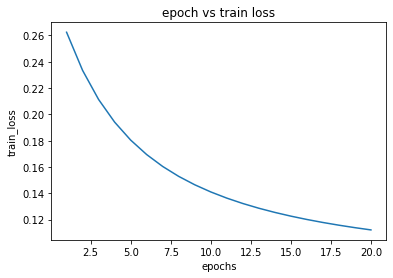

In [53]:
plt.plot(epochs,loss)
plt.xlabel('epochs')
plt.ylabel('train_loss')
plt.title('epoch vs train loss')
plt.show()

In [54]:
f_te=clf.decision_function(x_te)

In [55]:
print(x_te)

[[-0.87818218 -0.40267959  0.30662468  0.36473549 -1.28095615]
 [ 1.77084234 -0.98457258 -0.25349038 -0.36529347 -0.04691745]
 [ 0.46285791 -0.78657277  0.00320782 -0.03404839 -0.67012171]
 ...
 [-0.56997425 -0.05345364 -0.06935844 -0.08949842  0.16842398]
 [ 0.65122042  1.6527005   0.58633047  0.81470309 -0.41581087]
 [ 0.80190017  0.67966314  0.44993602  0.59669802 -0.81314302]]


In [56]:
probs=[]
for i in f_te:
  probs.append(sigmoid((w*i)+b))
print(probs)


[0.04584816492631805, 0.472874384946195, 0.17236632077949746, 0.4375433523947772, 0.07154515789905098, 0.799162886191476, 0.24051603805367402, 0.14858086016128333, 0.06371194303587945, 0.5388340816570336, 0.08271462468756774, 0.04054083929789205, 0.11815909477288548, 0.26093663314131654, 0.08253661257840393, 0.12115713798777081, 0.810895175247172, 0.047192758961075214, 0.438372263312389, 0.7563066428867405, 0.08094598144613749, 0.029398857958874192, 0.06652892067632003, 0.24763496714503128, 0.8289815052846194, 0.11488791096855278, 0.8631955227686513, 0.6232438123820646, 0.8324008384196858, 0.02742394549982979, 0.07806508367831685, 0.20353762135766382, 0.1178479592331276, 0.8693289116556616, 0.13441058252808039, 0.0921260529235029, 0.10277107096547458, 0.6813682827643885, 0.7591596180564395, 0.0962012419269696, 0.7675036477139326, 0.13039668958003212, 0.28846020954765283, 0.4640590922257485, 0.10954164202065171, 0.05934730021812817, 0.8485870289463586, 0.7214967083382804, 0.106071893358